In [1]:
%%capture
!pip install pandas seaborn matplotlib

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
aminoacids = pd.read_csv("./data/aminoacids_properties.csv")
aminoacids

,Abbr.,Name,Sym,MolecularWeight,MolecularFormula,ResidueFormula,ResidueWeight,pKa1,pKb2,pKx3,pl4,HydpH2,HydpH7
0,Ala,Alanine,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,0.00,6.00,47.0,41.0
1,Arg,Arginine,R,174.20,C6H14N4O2,C6H12N4O,156.19,2.17,9.04,12.48,10.76,-26.0,-14.0
2,Asn,Asparagine,N,132.12,C4H8N2O3,C4H6N2O2,114.11,2.02,8.80,0.00,5.41,-41.0,-28.0
3,Asp,Aspartic acid,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77,-18.0,-55.0
4,Cys,Cysteine,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07,52.0,49.0
5,Glu,Glutamic acid,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22,8.0,-31.0
6,Gln,Glutamine,Q,146.15,C5H10N2O3,C5H8N2O2,128.13,2.17,9.13,0.00,5.65,-18.0,-10.0
7,Gly,Glycine,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,0.00,5.97,0.0,0.0
8,His,Histidine,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59,-42.0,8.0
9,Hyp,Hydroxyproline,O,131.13,C5H9NO3,C5H7NO2,113.11,1.82,9.65,0.00,0.00,0.0,0.0


In [5]:
single_train = pd.read_csv("./data/single_muts_train.csv", index_col=0)
single_train

,name,sequence,secondary_structure,stabilityscore
0,EHEE_rd2_0005.pdb_V26L,GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.72
1,HHH_rd2_0134.pdb_R22D,SKDEAQREAERAIRSGNKEEADRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.22
2,HHH_rd2_0134.pdb_Q6K,SKDEAKREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.20
3,EHEE_0882.pdb_E2I,GSSQITIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59
4,EEHEE_rd3_1716.pdb_A26R,TEVHLGDIKLKYPNPEQAKKAAEKLRQKYNLTWTVIGDYVKIE,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.88
...,...,...,...,...
8545,HHH_rd2_0134.pdb_Y30N,SKDEAQREAERAIRSGNKEEARRILEEAGNSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.13
8546,EHEE_rd2_0005.pdb_W35E,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYEEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,0.44
8547,HEEH_rd3_0872.pdb_A35T,TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQTIEYLKKAY,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.64
8548,EEHEE_rd3_0037.pdb_E17S,TTIKVNGQEYTVPLSPSQAAKAAKKRWPDYEVQIHGNTVKVTR,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.68


In [6]:
single_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550 entries, 0 to 8549
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 8550 non-null   object 
 1   sequence             8550 non-null   object 
 2   secondary_structure  8550 non-null   object 
 3   stabilityscore       8550 non-null   float64
dtypes: float64(1), object(3)
memory usage: 334.0+ KB


In [7]:
single_train.describe()

,stabilityscore
count,8550.000000
mean,1.054056
std,0.400587
min,-0.270000
25%,0.790000
50%,1.040000
75%,1.320000
max,2.400000


In [9]:
sequence_len = single_train["sequence"].apply(lambda x: len(str(x)))
sequence_len.describe()

count    8550.0
mean       43.0
std         0.0
min        43.0
25%        43.0
50%        43.0
75%        43.0
max        43.0
Name: sequence, dtype: float64

In [11]:
secondary_len = single_train["secondary_structure"].apply(lambda x: len(str(x)))
secondary_len.describe()

count    8550.0
mean       43.0
std         0.0
min        43.0
25%        43.0
50%        43.0
75%        43.0
max        43.0
Name: secondary_structure, dtype: float64

In [14]:
sequence_aminoacids = {
    aminoacid
    for sequence in single_train["sequence"]
    for aminoacid in sequence
}
sequence_aminoacids, len(sequence_aminoacids)

({'A',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'K',
  'L',
  'M',
  'N',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'V',
  'W',
  'Y'},
 19)

In [16]:
sequence_aminoacids.issubset(set(aminoacids["Sym"]))

True

In [21]:
from collections import Counter
sequence_aminoacids_freq = pd.DataFrame(
    dict(Counter(sequence))
    for sequence in single_train["sequence"]
).reindex(sorted(sequence_aminoacids), axis=1)
sequence_aminoacids_freq = sequence_aminoacids_freq.fillna(0)
sequence_aminoacids_freq

,A,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,4,1.0,6.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,7.0,2.0,5.0,3.0,2.0,3.0
1,6,2.0,9.0,0.0,3.0,0.0,4.0,3.0,2.0,0.0,1.0,1.0,2.0,6.0,3.0,0.0,0.0,0.0,1.0
2,6,1.0,9.0,0.0,3.0,0.0,4.0,4.0,2.0,0.0,1.0,1.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0
3,2,1.0,8.0,0.0,3.0,2.0,3.0,5.0,1.0,0.0,1.0,0.0,1.0,6.0,2.0,2.0,4.0,1.0,1.0
4,3,2.0,4.0,0.0,2.0,1.0,3.0,7.0,4.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,6,1.0,9.0,0.0,3.0,0.0,4.0,3.0,2.0,0.0,2.0,1.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0
8546,4,1.0,7.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,7.0,2.0,5.0,4.0,1.0,3.0
8547,4,1.0,5.0,0.0,2.0,0.0,5.0,7.0,3.0,0.0,1.0,1.0,3.0,0.0,0.0,6.0,2.0,1.0,2.0
8548,4,1.0,2.0,0.0,2.0,1.0,2.0,5.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,5.0,5.0,1.0,2.0


In [22]:
sequence_aminoacids_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       8550 non-null   int64  
 1   D       8550 non-null   float64
 2   E       8550 non-null   float64
 3   F       8550 non-null   float64
 4   G       8550 non-null   float64
 5   H       8550 non-null   float64
 6   I       8550 non-null   float64
 7   K       8550 non-null   float64
 8   L       8550 non-null   float64
 9   M       8550 non-null   float64
 10  N       8550 non-null   float64
 11  P       8550 non-null   float64
 12  Q       8550 non-null   float64
 13  R       8550 non-null   float64
 14  S       8550 non-null   float64
 15  T       8550 non-null   float64
 16  V       8550 non-null   float64
 17  W       8550 non-null   float64
 18  Y       8550 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 1.2 MB


In [23]:
sequence_aminoacids_freq.describe()

,A,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
count,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000
mean,3.980351,1.226316,6.109942,0.605965,2.418246,0.750994,2.735322,5.715789,2.460819,0.056842,1.736608,0.971462,1.774035,3.108187,1.095088,2.900819,3.041520,0.738713,1.572982
std,1.154297,0.960750,3.052944,0.651936,0.690354,1.107132,1.572070,2.176055,1.487358,0.231554,0.837257,0.826868,1.311004,2.979968,0.981981,2.042933,1.756836,0.725703,1.126046
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
50%,4.000000,1.000000,5.000000,1.000000,2.000000,0.000000,3.000000,6.000000,3.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000
75%,5.000000,2.000000,9.000000,1.000000,3.000000,1.000000,4.000000,8.000000,4.000000,0.000000,2.000000,1.000000,2.000000,6.000000,2.000000,5.000000,4.000000,1.000000,3.000000
max,7.000000,4.000000,13.000000,3.000000,4.000000,5.000000,6.000000,10.000000,6.000000,1.000000,4.000000,4.000000,6.000000,8.000000,4.000000,8.000000,8.000000,3.000000,4.000000


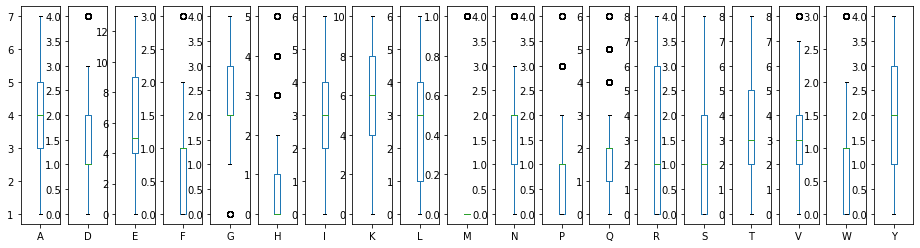

In [25]:
_ = sequence_aminoacids_freq.plot.box(subplots=True, figsize=(16, 4))

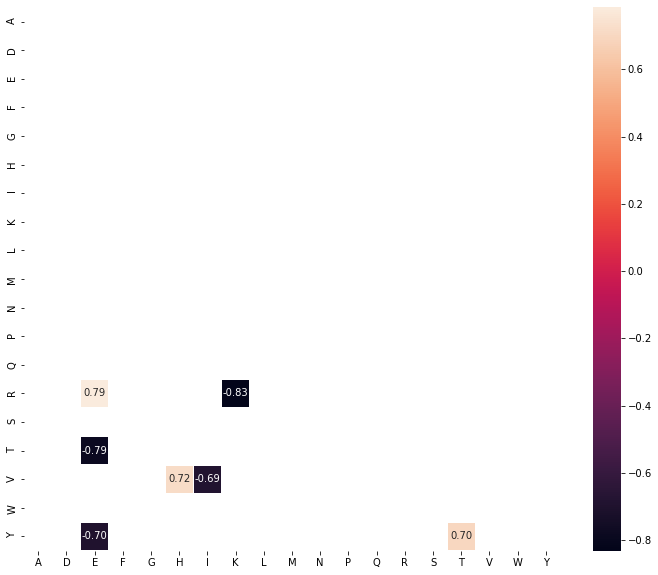

In [48]:
_, ax = plt.subplots(figsize=(12, 10))
sequence_aminoacids_freq_corr = sequence_aminoacids_freq.corr()
_ = sns.heatmap(
    sequence_aminoacids_freq_corr\
    .applymap(lambda x: x if x < -0.69 or x > +0.69 else None)\
    .where(np.tril(np.ones(sequence_aminoacids_freq_corr.shape), k=-1).astype(bool)),
    linewidths=.5, annot=True, fmt=".2f", ax=ax
)

<AxesSubplot:>

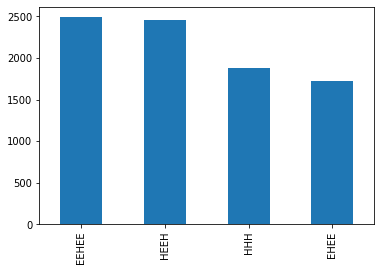

In [42]:
structure_type = single_train["name"].apply(lambda x: x.split("_")[0])
structure_type.value_counts().plot.bar()